Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [1]:
# Environment & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

In [2]:
# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame.copy()

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

        count          mean        std        min        25%         50%  \
age     442.0 -2.511817e-19   0.047619  -0.107226  -0.037299    0.005383   
sex     442.0  1.230790e-17   0.047619  -0.044642  -0.044642   -0.044642   
bmi     442.0 -2.245564e-16   0.047619  -0.090275  -0.034229   -0.007284   
bp      442.0 -4.797570e-17   0.047619  -0.112399  -0.036656   -0.005670   
s1      442.0 -1.381499e-17   0.047619  -0.126781  -0.034248   -0.004321   
s2      442.0  3.918434e-17   0.047619  -0.115613  -0.030358   -0.003819   
s3      442.0 -5.777179e-18   0.047619  -0.102307  -0.035117   -0.006584   
s4      442.0 -9.042540e-18   0.047619  -0.076395  -0.039493   -0.002592   
s5      442.0  9.293722e-17   0.047619  -0.126097  -0.033246   -0.001947   
s6      442.0  1.130318e-17   0.047619  -0.137767  -0.033179   -0.001078   
target  442.0  1.521335e+02  77.093005  25.000000  87.000000  140.500000   

               75%         max  
age       0.038076    0.110727  
sex       0.050680   

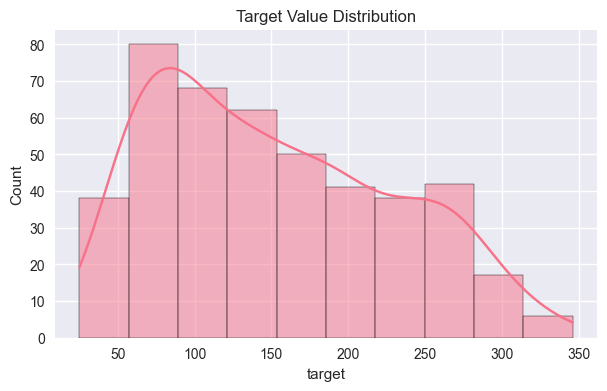

In [3]:
# Descriptive statistics
print(df.describe().T)

# Median
print("\nMedian values:")
print(df.median())

# Target distribution
plt.figure(figsize=(7,4))
sns.histplot(df["target"], kde=True)
plt.title("Target Value Distribution")
plt.show()


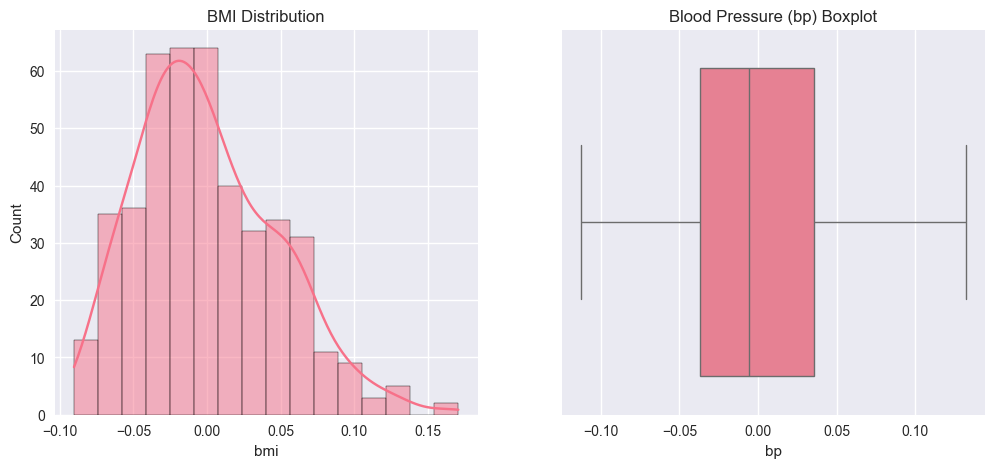

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")

plt.subplot(1,2,2)
sns.boxplot(x=df['bp'])
plt.title("Blood Pressure (bp) Boxplot")

plt.show()


In [5]:
print(df.isnull().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 0


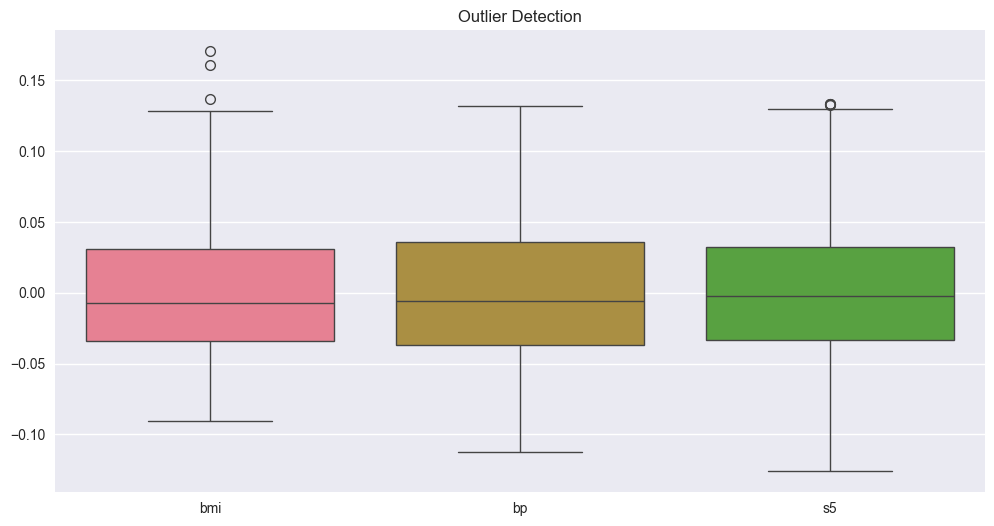

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['bmi', 'bp', 's5']])
plt.title("Outlier Detection")
plt.show()


In [8]:
from scipy.stats import zscore
df_clean = df[(np.abs(zscore(df)) < 3).all(axis=1)]


In [9]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
df_scaled.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


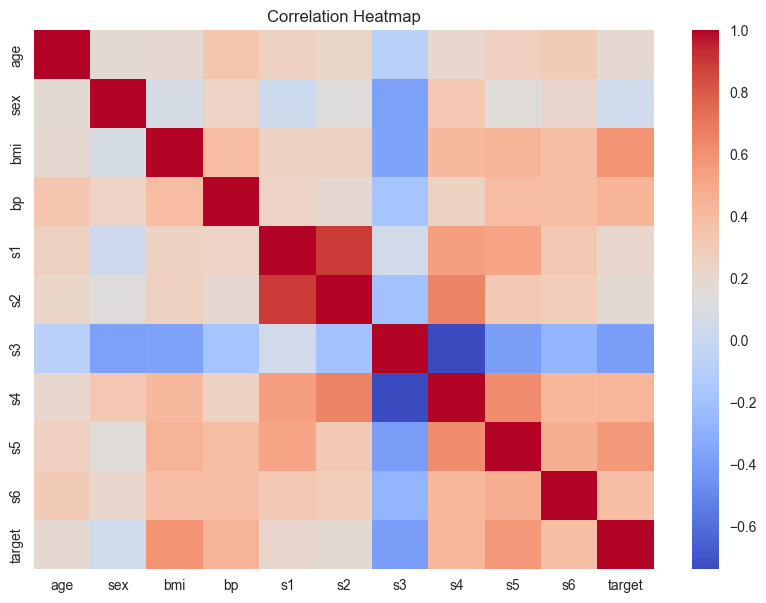

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
print(df.corr()["target"].sort_values(ascending=False))


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

In [12]:
# 1. Train-Test Split
X = df_clean.drop("target", axis=1)
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (344, 10)
Test size: (86, 10)


In [13]:
# 2. Select Models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)

# Train models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Predictions
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)


In [14]:
# Evaluation function
def evaluate(model_name, y_test, y_pred):
    print(f"\n----- {model_name} -----")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))

# Model Performance
evaluate("Linear Regression", y_test, pred_lr)
evaluate("Random Forest", y_test, pred_rf)


----- Linear Regression -----
MAE : 44.63597424659887
MSE : 2946.2613692105047
RMSE: 54.27947465857149
R² Score: 0.3666580124700154

----- Random Forest -----
MAE : 46.94744186046511
MSE : 3394.0386488372096
RMSE: 58.25837835742778
R² Score: 0.27040173486571695


In [15]:
# --------------------------------------------------
# 3. Hyperparameter Tuning with GridSearchCV
# --------------------------------------------------

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

In [16]:
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:")
print(grid.best_params_)




Best Parameters from Grid Search:
{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [17]:
# Evaluate best model
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

evaluate("Tuned Random Forest", y_test, best_pred)


----- Tuned Random Forest -----
MAE : 46.046480096126075
MSE : 3225.196556595761
RMSE: 56.79081401596354
R² Score: 0.3066968128911858


Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

In [18]:
# -------------------------------
# Milestone 4: Model Evaluation
# -------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)


In [19]:
# Convert regression target → binary target
# Median threshold: > median = 1, else 0
y_class = (df_clean["target"] > df_clean["target"].median()).astype(int)
X_class = df_clean.drop("target", axis=1)



In [20]:
# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)



In [21]:
# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)



RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred_c = clf.predict(X_test_c)
y_prob_c = clf.predict_proba(X_test_c)[:, 1]



In [23]:
# Evaluation Metrics
print("Accuracy :", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall   :", recall_score(y_test_c, y_pred_c))
print("F1 Score :", f1_score(y_test_c, y_pred_c))
print("ROC-AUC  :", roc_auc_score(y_test_c, y_prob_c))



Accuracy : 0.686046511627907
Precision: 0.7441860465116279
Recall   : 0.6666666666666666
F1 Score : 0.7032967032967034
ROC-AUC  : 0.7823464912280701


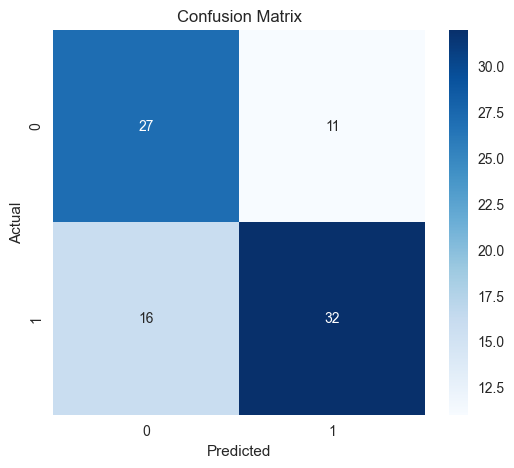

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<Figure size 600x500 with 0 Axes>

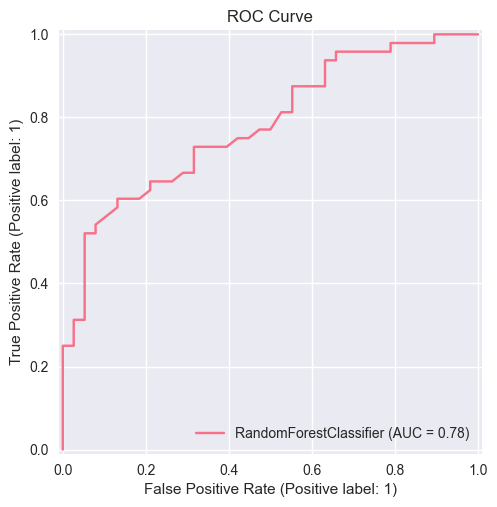

In [25]:

# ROC Curve
plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(clf, X_test_c, y_test_c)
plt.title("ROC Curve")
plt.show()


Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [26]:
# --------------------------
# Milestone 5: Deployment
# --------------------------

import joblib
import numpy as np



In [27]:
# 1. Save the model
model_path = "best_diabetes_model.pkl"
joblib.dump(clf, model_path)
print("Model saved as:", model_path)


Model saved as: best_diabetes_model.pkl


In [28]:

# 2. Load the saved model
loaded_model = joblib.load(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [29]:

# 3. Make a new prediction
# (Example new patient data — must be 10 features like the dataset)
new_data = np.array([[0.03, 0.05, 0.06, 0.02,
                      -0.04, -0.03, -0.04, -0.01,
                      0.02, -0.015]])


In [30]:

# Predict class
new_pred = loaded_model.predict(new_data)[0]


In [31]:

# Interpret output
if new_pred == 1:
    print("Prediction: High risk of diabetes progression.")
else:
    print("Prediction: Low risk of diabetes progression.")


Prediction: High risk of diabetes progression.
